Week 4 :Data Transformation



In [5]:
#import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

Task 1: Load Titanic Dataset from Seaborn

In [6]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

Task 2 :  Identify the missing values in columns

In [7]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Task 4 :Handling Missing Values

In [11]:
missing_count=df.isnull().sum()

In [12]:
missing_values=missing_count[missing_count>0]
print(missing_values)

embarked         2
deck           687
embark_town      2
dtype: int64


MCAR (Missing completely at random)
MAR (Missing at Random)
MNAR (Missing Not at Random)


In [13]:
#Handle missing values
df['age'] = df['age'].fillna(df['age'].mean())#impute missing values in the age with their mean
df['deck'] = df['deck'].fillna(df['deck'].mode())#impute missing values in the deck with their mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode())#impute missing values in the embark town with their mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode())#impute missing values in the embarked with their mode



Task4: Transforming the distribution of non-normal numeric features

In [14]:
#Investigate the distribution of the parch features
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

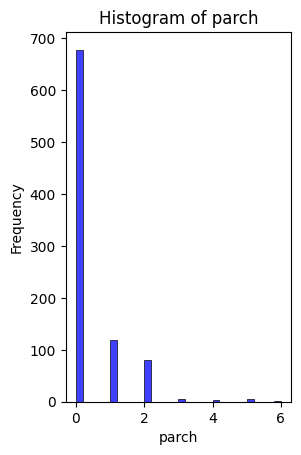

In [15]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['parch'], bins=30, kde=False, color='blue',
edgecolor='black')
plt.title('Histogram of parch')
plt.xlabel('parch')
plt.ylabel('Frequency')

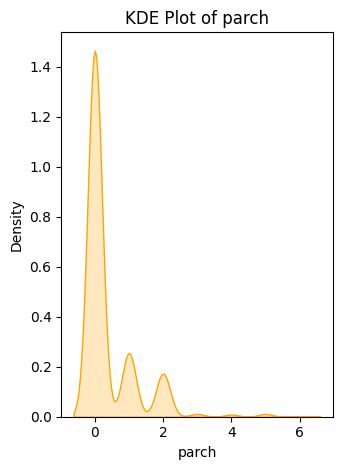

In [19]:
# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [21]:
# using a log transformation to modify the parch's distribution to a normal distribution
# from scipy import stats
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant
df['parch_shifted'] = df['parch'] + 1 # Shift by 1 to avoid zeros
df['parch_boxcox'], _ = stats.boxcox(df['parch_shifted'])

In [24]:
#Step 3: Visualize the distributions using KDE
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(0, 0.5, 'Density')

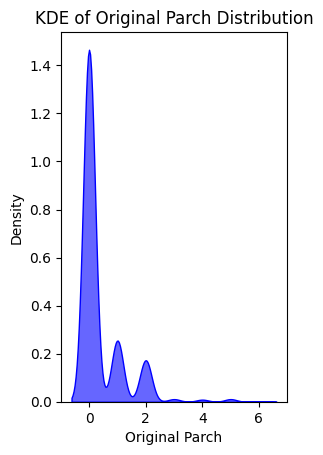

In [25]:
# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')

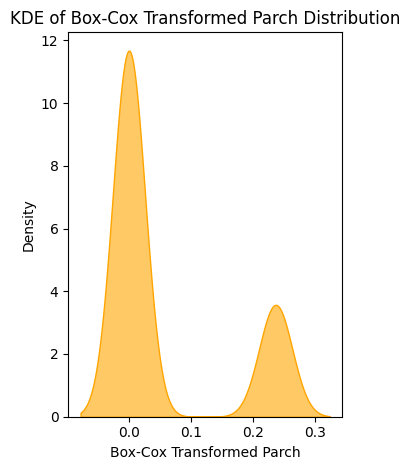

In [26]:
# KDE plot for Box-Cox transformed parch
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)
plt.title('KDE of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

Task 5 : Data Normalization


In [27]:
#Use the MinMaxScaler() to transform Age and Fare (float types) into the range [0,1].
scaler = MinMaxScaler()

In [28]:
# Apply Min-Max Scaling to 'age' and 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age','fare']])

In [29]:
scaler

MinMaxScaler()